In [7]:
import os
import json
from collections import defaultdict

large_evidences_paths = defaultdict(list)
small_evidences_paths = defaultdict(list)
for root, dirs, files in os.walk("../results"):
    for file in files:
        if "tasks_50_evidences_30" in file:
            verdicts = {}  # {task_id: {re-arc_io_pairs_indices: [...], hypotheses{}}
            with open(os.path.join(root, file), "r") as f:
                
            small_evidences_paths[root.split("/")[-1]].append()
        elif "tasks_50_evidences_100" in file:
            large_evidences_paths[root.split("/")[-1]].append(os.path.join(root, file))

print(small_evidences_paths)
print(large_evidences_paths)

defaultdict(<class 'list'>, {'arc_train_240': ['../results/arc_train_240/arc_problems_train_240_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1105182739940769_tasks_50_evidences_30_exec_results_v4.jsonl'], 'arc_train_160': ['../results/arc_train_160/arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1107191100011333_tasks_50_evidences_30_exec_results_v4.jsonl']})
defaultdict(<class 'list'>, {'arc_train_240': ['../results/arc_train_240/arc_problems_train_240_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1105182739940769_tasks_50_evidences_100_exec_results_v4.jsonl'], 'arc_train_160': ['../results/arc_train_160/arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1107191100011333_tasks_50_evidences_100_exec_results_v4.jsonl']})


In [13]:
import json

with open("/mnt/nas/suehyun/BARC/results/arc_train_160/arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1107191100011333_tasks_50_evidences_30_exec_results_v4.jsonl") as f:
    for line in f:
        d = json.loads(line)
        print(d.keys())
        print([type(v) for v in d.values()])
        break

dict_keys(['uid', 'prompt', 'responses', 'base_model', 'lora_dir', 're-arc_io_pairs_indices', 'verdicts', 'output_grids'])
[<class 'str'>, <class 'str'>, <class 'list'>, <class 'str'>, <class 'NoneType'>, <class 'list'>, <class 'list'>, <class 'list'>]


In [48]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read and parse the file
verdicts_matrix = np.zeros((30, 64))  # 30 problems x 64 responses
verdict_map = {None: 0, False: 1, True: 2}  # mapping for color intensity

metadata = json.load(open("/mnt/nas/suehyun/ARC/dataset/RE-ARC/metadata.json"))
# Create custom colormap with 3 distinct colors
colors = ['lightgray', 'lightsalmon', 'dodgerblue']  # None, False, True
cmap = sns.color_palette(colors, as_cmap=True)

plot_dir = "/mnt/nas/suehyun/BARC/results/arc_train_160/tasks_50_evidences_30_h_64_heatmaps"
os.makedirs(plot_dir, exist_ok=True)
with open("/mnt/nas/suehyun/BARC/results/arc_train_160/arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1107191100011333_tasks_50_evidences_30_exec_results_v4.jsonl") as f:
    for line in f:
        data = json.loads(line)
        uid = data['uid']
        pso_difficulties = metadata[uid]["pso_difficulties"]  # pso difficulties
        pair_indices = data['re-arc_io_pairs_indices']  # re-arc io pairs indices
        difficulty_indices = sorted(range(len(pair_indices)), key=lambda i: pso_difficulties[pair_indices[i]])  # sort by pso difficulty
        # for orig_idx, difficulty_idx in zip(range(len(pair_indices)), difficulty_indices):  # sanity check
        #     print(orig_idx, difficulty_idx, pair_indices[difficulty_idx], pso_difficulties[pair_indices[difficulty_idx]])
        verdicts = data['verdicts']  # verdicts
        for i, verdict_list in enumerate(verdicts):
            verdict_list = [verdict_list[i] for i in difficulty_indices]
            for j, verdict in enumerate(verdict_list):
                verdicts_matrix[j, i] = verdict_map[verdict]

        # Create heatmap
        plt.figure(figsize=(20, 10))
        heatmap = sns.heatmap(verdicts_matrix,
                            cmap=cmap,  # Use custom 3-color colormap
                            xticklabels=range(1, 65),  # h_1 to h_64
                            yticklabels=range(1, 31))  # p_1 to p_30

        # Get the colorbar and set its ticks and labels
        colorbar = heatmap.collections[0].colorbar
        # Calculate tick positions (center of each color region)
        ticks = np.linspace(0, 2, 4)[:-1] + 0.33  # [0.33, 1.0, 1.67]
        colorbar.set_ticks(ticks)
        colorbar.set_ticklabels(['None', 'False', 'True'])
        colorbar.set_label('Verdict')

        plt.title('Verdicts Heatmap')
        plt.xlabel('Responses (Hypotheses)')
        plt.ylabel('Problems')
        plt.tight_layout()
        plt.savefig(os.path.join(plot_dir, f"{uid}.png"))
        plt.close()

0 19 662 0.2538463308028525
1 28 929 0.30823211410167933
2 11 380 0.3248611111111111
3 2 80 0.34660130718954246
4 13 403 0.3516049382716049
5 17 593 0.3752574277574277
6 24 826 0.3783938019652305
7 7 312 0.3847777777777777
8 6 291 0.38679337231968813
9 8 344 0.3970899470899471
10 26 870 0.39987654320987653
11 16 520 0.4011793372319688
12 14 413 0.41957671957671955
13 25 828 0.426975986975987
14 20 717 0.43648148148148147
15 10 377 0.44132996632996635
16 21 768 0.4478128991060026
17 29 934 0.451585414189457
18 1 50 0.45391810259457316
19 0 7 0.45736772486772487
20 22 808 0.4624201787994891
21 3 158 0.4668082788671024
22 15 479 0.47196675471787913
23 18 653 0.48434865900383145
24 9 345 0.48605363984674327
25 23 815 0.4908427815570673
26 5 248 0.5222671676982021
27 4 170 0.5380459770114943
28 12 382 0.5768944099378882
29 27 915 0.590993369913123


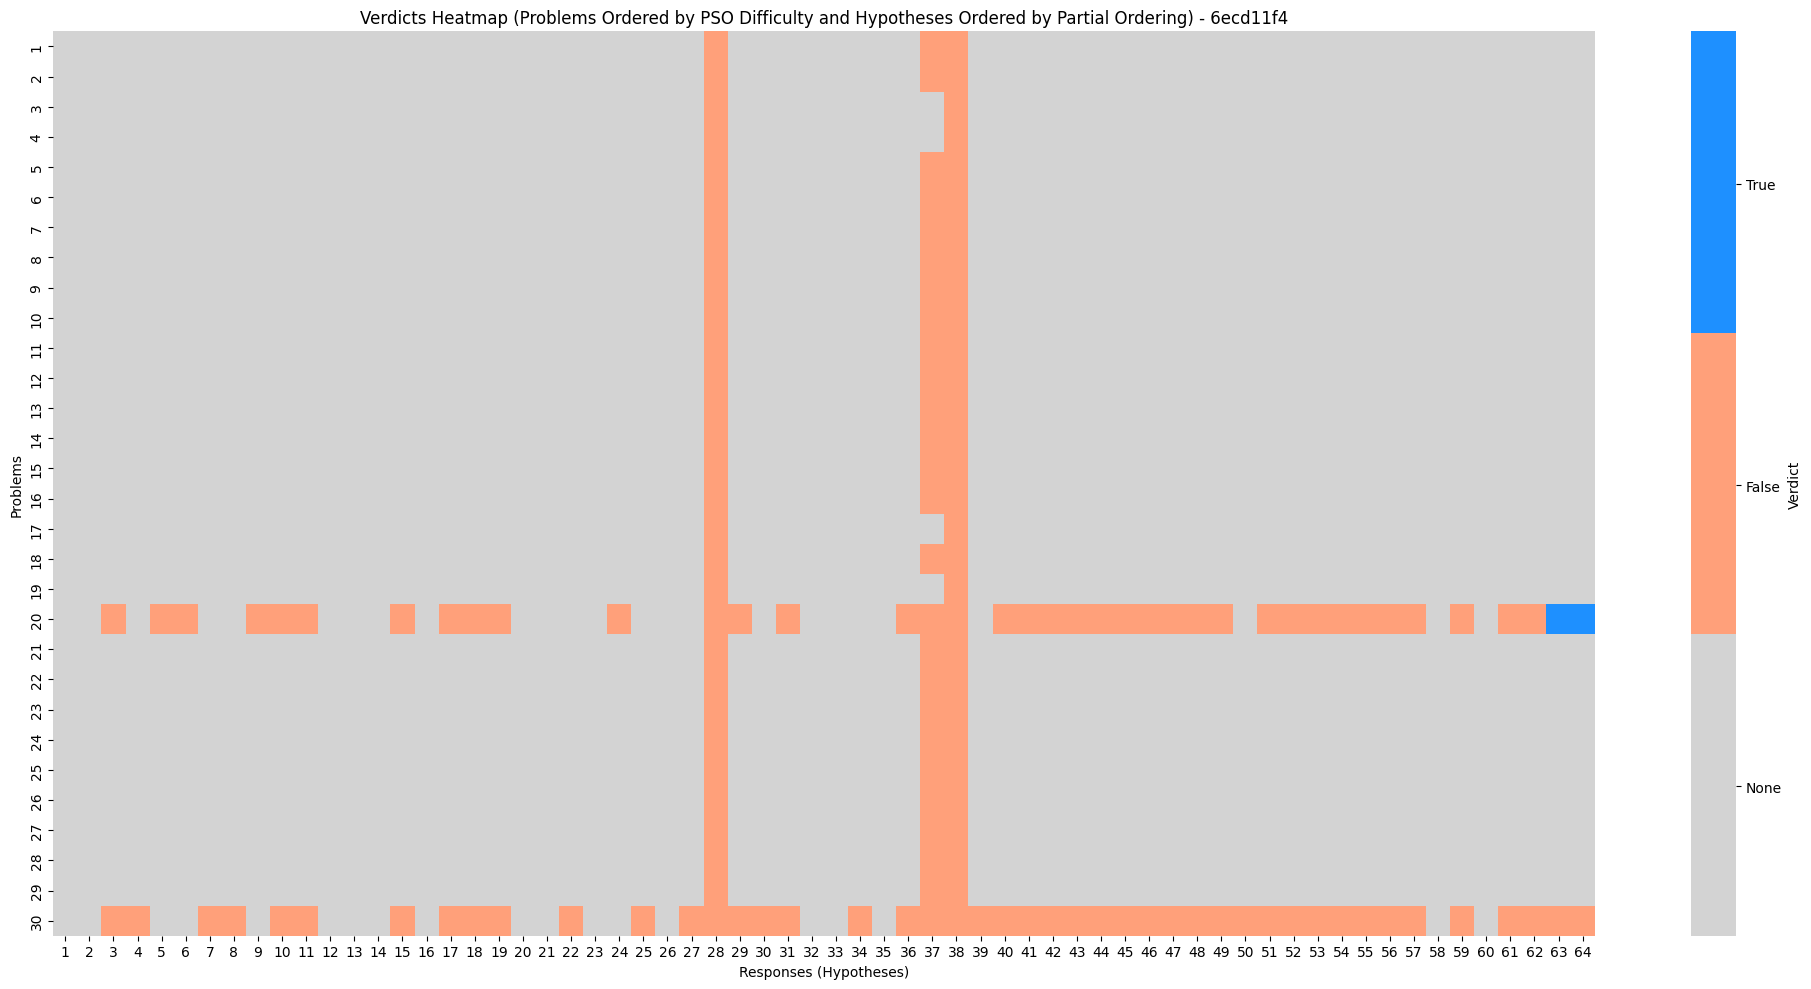

In [53]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Read and parse the file
verdicts_matrix = np.zeros((30, 64))  # 30 problems x 64 responses
verdict_map = {None: 0, False: 1, True: 2}  # mapping for color intensity

def count_correct_predictions(hypothesis_verdicts):
    """Count how many True predictions a hypothesis makes"""
    return sum(1 for v in hypothesis_verdicts if v is True)

def is_strictly_better(h1_verdicts, h2_verdicts):
    """Check if h2 is strictly better than h1 (h1 < h2)"""
    if len(h1_verdicts) != len(h2_verdicts):
        return False
    
    # Check if all True predictions in h1 are also True in h2
    # and h2 has at least one more True prediction
    has_extra = False
    for v1, v2 in zip(h1_verdicts, h2_verdicts):
        if v1 is True and v2 is not True:  # h1 has True but h2 doesn't
            return False
        if v1 is not True and v2 is True:  # h2 has True but h1 doesn't
            has_extra = True
    return has_extra

metadata = json.load(open("/mnt/nas/suehyun/ARC/dataset/RE-ARC/metadata.json"))
colors = ['lightgray', 'lightsalmon', 'dodgerblue']  # None, False, True
cmap = sns.color_palette(colors, as_cmap=True)

plot_dir = "/mnt/nas/suehyun/BARC/results/arc_train_160/tasks_50_evidences_30_h_64_heatmaps"
os.makedirs(plot_dir, exist_ok=True)

with open("/mnt/nas/suehyun/BARC/results/arc_train_160/arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1107191100011333_tasks_50_evidences_30_exec_results_v4.jsonl") as f:
    for line in f:
        data = json.loads(line)
        uid = data['uid']
        pso_difficulties = metadata[uid]["pso_difficulties"]
        pair_indices = data['re-arc_io_pairs_indices']
        difficulty_indices = sorted(range(len(pair_indices)), 
                                 key=lambda i: pso_difficulties[pair_indices[i]])
        
        # Get verdicts and sort problems by difficulty
        verdicts = data['verdicts']  # [64 hypotheses][30 problems]
        sorted_verdicts = []
        for hypothesis_verdicts in verdicts:  # for each hypothesis
            sorted_verdicts.append([hypothesis_verdicts[i] for i in difficulty_indices])
        
        # Sort hypotheses by partial ordering
        hypothesis_indices = list(range(len(sorted_verdicts)))  # range(64)
        hypothesis_indices.sort(key=lambda i: (
            count_correct_predictions(sorted_verdicts[i]),  # Negative to sort in descending order
            sum(is_strictly_better(sorted_verdicts[j], sorted_verdicts[i]) 
                for j in range(len(sorted_verdicts)))
        ))
        
        # Fill the verdicts matrix with both sortings applied
        for i, hypothesis_idx in enumerate(hypothesis_indices):  # i: new position, hypothesis_idx: original position
            for j in range(len(difficulty_indices)):  # j: problem index
                verdicts_matrix[j, i] = verdict_map[sorted_verdicts[hypothesis_idx][j]]

        # Create heatmap
        plt.figure(figsize=(20, 10))
        heatmap = sns.heatmap(verdicts_matrix,
                            cmap=cmap,
                            xticklabels=range(1, 65),
                            yticklabels=range(1, 31))

        # Get the colorbar and set its ticks and labels
        colorbar = heatmap.collections[0].colorbar
        ticks = np.linspace(0, 2, 4)[:-1] + 0.33
        colorbar.set_ticks(ticks)
        colorbar.set_ticklabels(['None', 'False', 'True'])
        colorbar.set_label('Verdict')

        plt.title(f'Verdicts Heatmap (Problems Ordered by PSO Difficulty and Hypotheses Ordered by Partial Ordering) - {uid}')
        plt.xlabel('Responses (Hypotheses)')
        plt.ylabel('Problems')
        plt.tight_layout()
        plt.show()
        break
        plt.savefig(os.path.join(plot_dir, f"{uid}.png"))

In [58]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Read and parse the file
verdicts_matrix = np.zeros((30, 64))  # 30 problems x 64 responses
verdict_map = {None: 0, False: 1, True: 2}  # mapping for color intensity

def count_predictions(hypothesis_verdicts):
    """Count predictions with True > False > None"""
    true_count = sum(1 for v in hypothesis_verdicts if v is True)
    false_count = sum(1 for v in hypothesis_verdicts if v is False)
    return (true_count, false_count)

def is_strictly_better(h1_verdicts, h2_verdicts):
    """Check if h2 is strictly better than h1 (h1 < h2)"""
    if len(h1_verdicts) != len(h2_verdicts):
        return False
    
    has_extra = False
    for v1, v2 in zip(h1_verdicts, h2_verdicts):
        # Check True predictions
        if v1 is True and v2 is not True:
            return False
        if v1 is not True and v2 is True:
            has_extra = True
            continue
            
        # If neither has True, check False vs None
        if v1 is False and v2 is None:
            return False
        if v1 is None and v2 is False:
            has_extra = True
            
    return has_extra

metadata = json.load(open("/mnt/nas/suehyun/ARC/dataset/RE-ARC/metadata.json"))
colors = ['lightgray', 'lightsalmon', 'dodgerblue']  # None, False, True
cmap = sns.color_palette(colors, as_cmap=True)

plot_dir = "/mnt/nas/suehyun/BARC/results/arc_train_160/tasks_50_evidences_30_h_64_heatmaps"
os.makedirs(plot_dir, exist_ok=True)

with open("/mnt/nas/suehyun/BARC/results/arc_train_160/arc_problems_train_160_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1107191100011333_tasks_50_evidences_30_exec_results_v4.jsonl") as f:
    for line in tqdm(f):
        data = json.loads(line)
        uid = data['uid']
        pso_difficulties = metadata[uid]["pso_difficulties"]
        pair_indices = data['re-arc_io_pairs_indices']
        difficulty_indices = sorted(range(len(pair_indices)), 
                                 key=lambda i: pso_difficulties[pair_indices[i]])
        
        # Get verdicts and sort problems by difficulty
        verdicts = data['verdicts']  # [64 hypotheses][30 problems]
        sorted_verdicts = []
        for hypothesis_verdicts in verdicts:  # for each hypothesis
            sorted_verdicts.append([hypothesis_verdicts[i] for i in difficulty_indices])
        
        # Sort hypotheses by partial ordering
        hypothesis_indices = list(range(len(sorted_verdicts)))  # range(64)
        hypothesis_indices.sort(key=lambda i: (
            count_predictions(sorted_verdicts[i]),  # Returns (true_count, false_count)
            sum(is_strictly_better(sorted_verdicts[j], sorted_verdicts[i]) 
                for j in range(len(sorted_verdicts)))
        ))
        
        # Fill the verdicts matrix with both sortings applied
        for i, hypothesis_idx in enumerate(hypothesis_indices):  # i: new position, hypothesis_idx: original position
            for j in range(len(difficulty_indices)):  # j: problem index
                verdicts_matrix[j, i] = verdict_map[sorted_verdicts[hypothesis_idx][j]]

        # Create heatmap
        plt.figure(figsize=(20, 10))
        heatmap = sns.heatmap(verdicts_matrix,
                            cmap=cmap,
                            xticklabels=range(1, 65),
                            yticklabels=range(1, 31))

        # Get the colorbar and set its ticks and labels
        colorbar = heatmap.collections[0].colorbar
        ticks = np.linspace(0, 2, 4)[:-1] + 0.33
        colorbar.set_ticks(ticks)
        colorbar.set_ticklabels(['None', 'False', 'True'])
        colorbar.set_label('Verdict')

        plt.title(f'Verdicts Heatmap (Problems Ordered by PSO Difficulty and Hypotheses Ordered by Partial Ordering) - {uid}')
        plt.xlabel('Responses (Hypotheses)')
        plt.ylabel('Problems')
        plt.tight_layout()
        plt.savefig(os.path.join(plot_dir, f"{uid}.png"), dpi=300, bbox_inches='tight')
        plt.close()

50it [00:55,  1.12s/it]


In [66]:
import os
from PIL import Image
from tqdm import tqdm
# Define the source directories and their order
source_dirs = [
    "../results/arc_train_240/tasks_50_train_pairs_h_64_heatmaps",
    "../results/arc_train_240/tasks_50_evidences_30_h_64_heatmaps",
    "../results/arc_train_240/tasks_50_evidences_100_h_64_heatmaps"
]

# Create output directories
output_dir = os.path.join("../results/arc_train_240/", "tasks_50_agg_heatmaps")
os.makedirs(output_dir, exist_ok=True)

# Get list of common filenames
first_dir_files = set(os.listdir(source_dirs[0]))
common_files = first_dir_files.intersection(*[set(os.listdir(dir)) for dir in source_dirs[1:]])

# Process each common file
for filename in tqdm(common_files):
    if not filename.endswith('.png'):
        continue
        
    # Open all three images
    images = [Image.open(os.path.join(dir, filename)) for dir in source_dirs]
    
    # Calculate total width and max height
    total_width = sum(img.width for img in images)
    max_height = max(img.height for img in images)
    
    # Create new image
    combined = Image.new('RGB', (total_width, max_height))
    
    # Paste images side by side
    x_offset = 0
    for img in images:
        combined.paste(img, (x_offset, 0))
        x_offset += img.width
        img.close()
    
    # Save combined image in each tasks_50 subdirectory
    for source_dir in source_dirs:
        output_path = os.path.join(output_dir, filename)
        combined.save(output_path)
    
    combined.close()

100%|██████████| 50/50 [04:04<00:00,  4.89s/it]


In [68]:
import json

with open("../results/arc_train_240/arc_problems_train_240_extra_newline_v2_Llama-3.1-ARC-Potpourri-Induction-8B_temp_0.8_1105182739940769_exec_results_v4.jsonl") as f:
    for i, line in enumerate(f):
        data = json.loads(line)
        if data['uid'] == "4347f46a":
            print(i)
            break

212


In [69]:
print("Let's solve this puzzle using Python code with the common library functions. We'll first reason about the problem and then write the code to solve it. The `transform` function will take the input grid and return the output grid. Here is the Python code with the comments describing how to solve the problem:\n```python\nfrom common import *\n\nimport numpy as np\nfrom typing import *\n\n# concepts:\n# topology, boundary detection\n\n# description:\n# The input grid consists of colored regions on a black background. Each colored region is surrounded by black pixels. \n# To produce the output grid, you need to find the boundaries of each colored region and replace the interior of those regions with black pixels, leaving only the boundaries visible.\n\ndef transform(input_grid):\n    # Create initial output grid template based on input grid.\n    output_grid = np.full_like(input_grid, Color.BLACK)\n\n    # Detect boundaries of colored regions\n    boundary_mask = object_boundary(input_grid, background=Color.BLACK)\n\n    # Fill the output grid with boundaries\n    output_grid[boundary_mask] = input_grid[boundary_mask]\n\n    return output_grid\n```")

Let's solve this puzzle using Python code with the common library functions. We'll first reason about the problem and then write the code to solve it. The `transform` function will take the input grid and return the output grid. Here is the Python code with the comments describing how to solve the problem:
```python
from common import *

import numpy as np
from typing import *

# concepts:
# topology, boundary detection

# description:
# The input grid consists of colored regions on a black background. Each colored region is surrounded by black pixels. 
# To produce the output grid, you need to find the boundaries of each colored region and replace the interior of those regions with black pixels, leaving only the boundaries visible.

def transform(input_grid):
    # Create initial output grid template based on input grid.
    output_grid = np.full_like(input_grid, Color.BLACK)

    # Detect boundaries of colored regions
    boundary_mask = object_boundary(input_grid, background=Color.B

In [70]:
print("Let's solve this puzzle using Python code with the common library functions. We'll first reason about the problem and then write the code to solve it. The `transform` function will take the input grid and return the output grid. Here is the Python code with the comments describing how to solve the problem:\n```python\nfrom common import *\n\nimport numpy as np\nfrom typing import *\n\n# concepts:\n# topology, object detection, pixel manipulation\n\n# description:\n# In the input grid, there are colored regions surrounded by a black background.\n# The task is to identify the boundaries of these colored regions and fill the interior of each region with a new color (e.g., blue).\n# The output grid should maintain the boundaries of the original colors while filling their interiors with blue.\n\ndef transform(input_grid):\n    # Create an output grid based on the input grid\n    output_grid = input_grid.copy()\n\n    # Identify the boundaries of the colored regions\n    boundary_mask = object_boundary(input_grid, background=Color.BLACK)\n\n    # Iterate through the grid to fill the interiors of the colored regions\n    for x, y in np.argwhere(~boundary_mask):\n        if input_grid[x, y] != Color.BLACK:\n            output_grid[x, y] = Color.BLUE  # Fill the interior with blue\n\n    return output_grid\n```")

Let's solve this puzzle using Python code with the common library functions. We'll first reason about the problem and then write the code to solve it. The `transform` function will take the input grid and return the output grid. Here is the Python code with the comments describing how to solve the problem:
```python
from common import *

import numpy as np
from typing import *

# concepts:
# topology, object detection, pixel manipulation

# description:
# In the input grid, there are colored regions surrounded by a black background.
# The task is to identify the boundaries of these colored regions and fill the interior of each region with a new color (e.g., blue).
# The output grid should maintain the boundaries of the original colors while filling their interiors with blue.

def transform(input_grid):
    # Create an output grid based on the input grid
    output_grid = input_grid.copy()

    # Identify the boundaries of the colored regions
    boundary_mask = object_boundary(input_gr